https://pystan.readthedocs.org/

Install

```
conda install pystan
```

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import pystan

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Eight schools example

https://pystan.readthedocs.org/en/latest/getting_started.html

In [4]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [5]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [6]:
fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

In [7]:
fit

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.71    0.31    5.4  -3.09   4.37   7.56  11.27  18.42  309.0    1.0
tau         6.9    0.38    6.0   0.35    2.6   5.44   9.76  21.85  253.0   1.01
eta[0]     0.35    0.04   0.92  -1.44  -0.26   0.36   0.97   2.17  518.0    1.0
eta[1]     0.02    0.04   0.86  -1.63  -0.52 2.8e-3   0.56   1.72  529.0    1.0
eta[2]    -0.17    0.04   0.91  -1.95  -0.78   -0.2   0.42   1.61  619.0    1.0
eta[3]    -0.02    0.03   0.83  -1.63  -0.58  -0.04   0.52    1.7  620.0    1.0
eta[4]    -0.36    0.04   0.88  -1.98  -0.95  -0.38    0.2   1.45  517.0    1.0
eta[5]    -0.21    0.04   0.88  -1.89  -0.82  -0.19   0.37   1.59  571.0    1.0
eta[6]     0.37    0.04   0.86  -1.28   -0.2    0.4   0.94   2.03  578.0    1.0
eta[7]     0.

In [8]:
la = fit.extract(permuted=True)
la.keys()

[u'mu', u'tau', u'eta', u'theta', u'lp__']

In [9]:
for k,v in la.iteritems():
    print k,v.shape

mu (2000,)
tau (2000,)
eta (2000, 8)
theta (2000, 8)
lp__ (2000,)


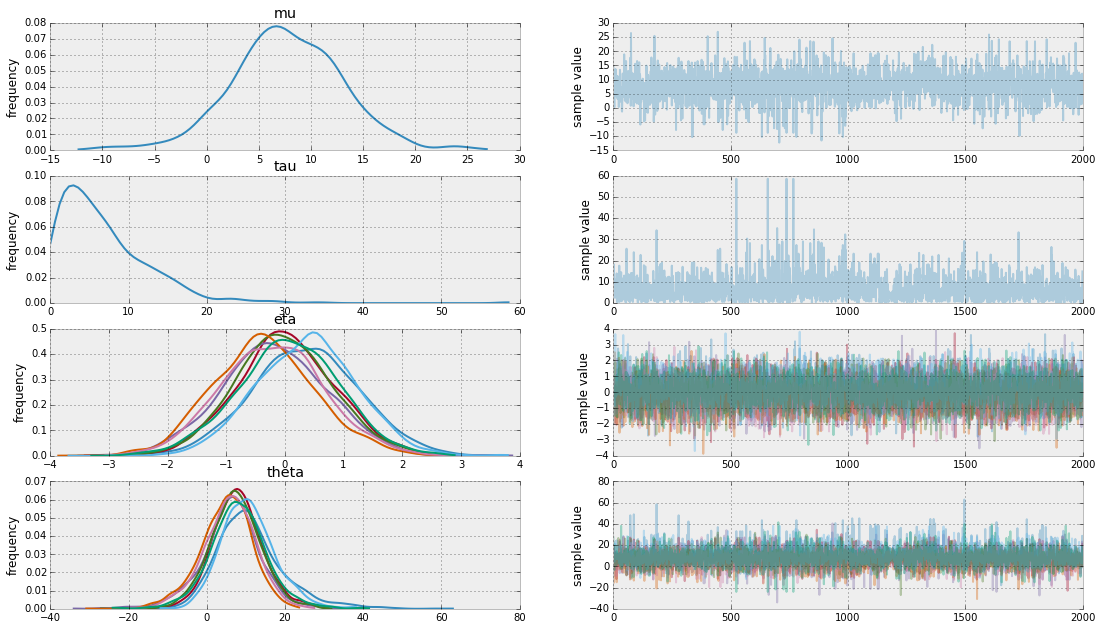

In [10]:
fit.plot()
plt.gcf().set_size_inches(18.5, 10.5);

# Optimization in Stan

https://pystan.readthedocs.org/en/latest/optimizing.html

In [11]:
ocode = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real mu;
}
model {
    y ~ normal(mu, 1);
}
"""
sm = pystan.StanModel(model_code=ocode)

In [12]:
y2 = np.random.normal(size=20)
np.mean(y2)

0.21419960153137704

In [13]:
op = sm.optimizing(data=dict(y=y2, N=len(y2)))
op

OrderedDict([(u'mu', array(0.21419960153137668))])